In [1]:
from tensorflow.keras.applications import Xception, InceptionV3
# nalezy wykorzystac odpowiednia funkcje do preprocessingu - nalezy ja znalezc za 
# posrednictem keras applications i strony dla odpowiedniego modelu

from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model

from tensorflow.keras.applications.inception_v3 import preprocess_input 
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
import glob, os

In [2]:
def read_img(filename, size):
    img = load_img(filename, target_size=size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array
    
img = read_img("Andrzej.jpg",(299,299))


In [3]:
def create_dataset(main_folder_path, size):
    X = []
    y = []

    os.chdir(".")
    for file in glob.glob(main_folder_path + "/*/*.jp*"):
        X.append(read_img(file, size))
        y.append(file.split('\\')[1])
    X = np.asarray(X)
    y = np.asarray(y).astype('float32')
    return X, y
X, y = create_dataset("faces", (299,299))

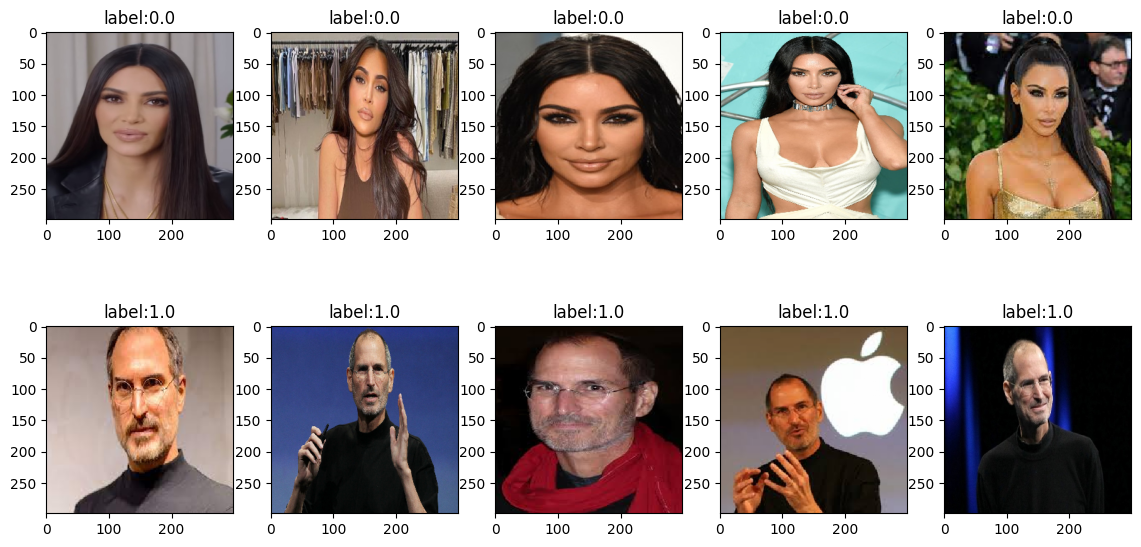

In [4]:
def plot_images(X, y, rows=2, cols=5, clustering=False, nntesting=False, y_pred=None):
    # rows - number of classes - 2
    # cols - number of instances in one class - 5 images per class
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 7))
    counter = 0
    for row in range(rows):
        for col in range(cols):
            ax[row][col].imshow(X[counter] * 0.5 + 0.5)
            if not clustering and not nntesting:
                ax[row][col].set_title(f"label:{y[counter]}")
            else:
                if clustering:
                    ax[row][col].set_title(f"cluster number:{y[counter]}")
                else:
                    ax[row][col].set_title(f"true:{y[counter]} predicted:{y_pred[counter]}")
            counter += 1
    plt.show()

plot_images(X,y)

In [5]:
X, y = create_dataset("faces", (299, 299))
X_test, y_test = create_dataset("test", (299, 299))

In [6]:
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X shape: (10, 299, 299, 3), y shape: (10,)
X_test shape: (4, 299, 299, 3), y_test shape: (4,)


Train:


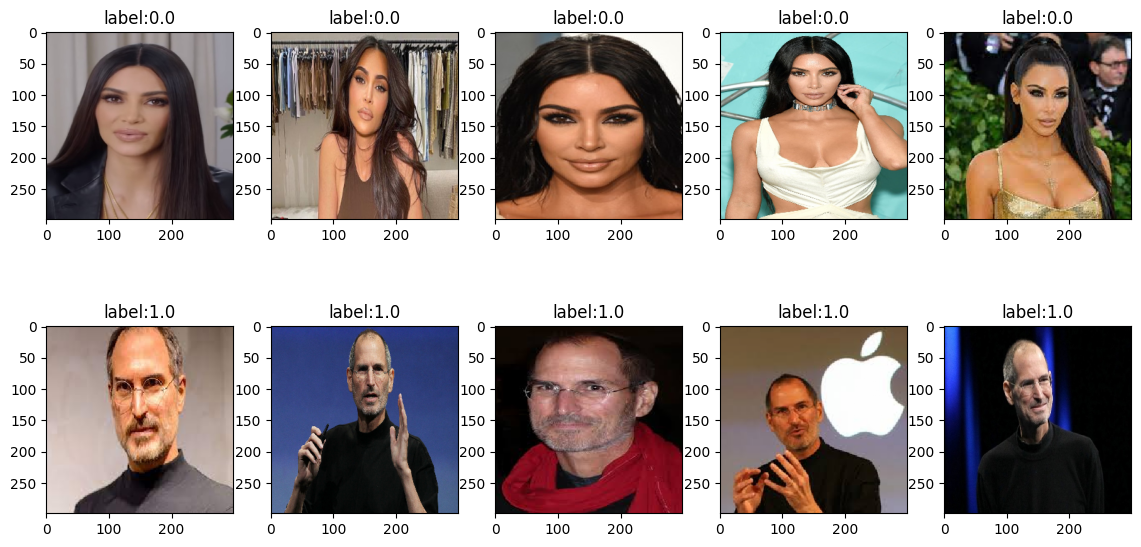

Test:


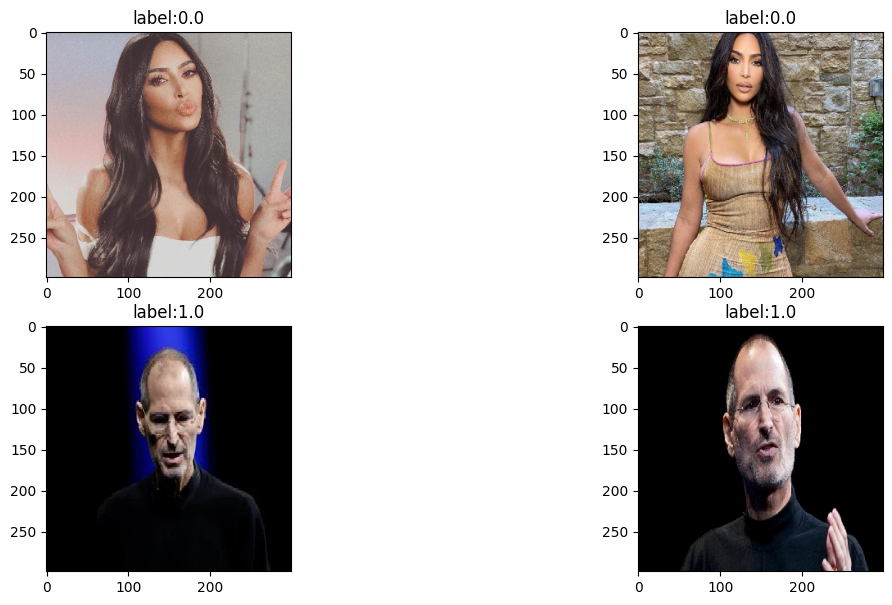

In [7]:
print("Train:")
plot_images(X, y)
print("Test:")
plot_images(X_test, y_test, rows=2, cols=2)

In [ ]:
GRUPOWANIE

In [8]:
from keras import Model
# Wczytanie wybranego modelu - przyklad - model Xception
model = Xception()

model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [9]:
# zapisanie do listy nazw warstw
model_layers = [layer.name for layer in model.layers]
print(model_layers)

['input_layer', 'block1_conv1', 'block1_conv1_bn', 'block1_conv1_act', 'block1_conv2', 'block1_conv2_bn', 'block1_conv2_act', 'block2_sepconv1', 'block2_sepconv1_bn', 'block2_sepconv2_act', 'block2_sepconv2', 'block2_sepconv2_bn', 'conv2d', 'block2_pool', 'batch_normalization', 'add', 'block3_sepconv1_act', 'block3_sepconv1', 'block3_sepconv1_bn', 'block3_sepconv2_act', 'block3_sepconv2', 'block3_sepconv2_bn', 'conv2d_1', 'block3_pool', 'batch_normalization_1', 'add_1', 'block4_sepconv1_act', 'block4_sepconv1', 'block4_sepconv1_bn', 'block4_sepconv2_act', 'block4_sepconv2', 'block4_sepconv2_bn', 'conv2d_2', 'block4_pool', 'batch_normalization_2', 'add_2', 'block5_sepconv1_act', 'block5_sepconv1', 'block5_sepconv1_bn', 'block5_sepconv2_act', 'block5_sepconv2', 'block5_sepconv2_bn', 'block5_sepconv3_act', 'block5_sepconv3', 'block5_sepconv3_bn', 'add_3', 'block6_sepconv1_act', 'block6_sepconv1', 'block6_sepconv1_bn', 'block6_sepconv2_act', 'block6_sepconv2', 'block6_sepconv2_bn', 'block6

In [10]:
model = Xception()

# Wybór warstwy, 
selected_layer_name = 'avg_pool'

# Tworzenie ekstraktora cech
pred_intermediate = Model(inputs=model.input, 
                          outputs=model.get_layer(selected_layer_name).output)

# Wyświetlenie podsumowania nowego modelu
pred_intermediate.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [23]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model

# Wczytanie modelu z pełnym klasyfikatorem
base_model = Xception(include_top=True, weights='imagenet', input_shape=(299, 299, 3))

# Wybór warstwy spłaszczającej
selected_layer_name = 'avg_pool'

# Tworzenie modelu do ekstrakcji cech
model_embeddings = Model(inputs=base_model.input, 
                         outputs=base_model.get_layer(selected_layer_name).output)

#model_embeddings.summary()
pred_intermediate = model_embeddings.predict(X)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [24]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# Predykcja dla zbioru treningowego
print("Predykcje dla danych treningowych:")
predictions_train = model.predict(X)
decoded_predictions_train = decode_predictions(predictions_train, top=5)

for i, pred in enumerate(decoded_predictions_train):
    print(f"\nObraz {i + 1}:")
    for rank, (imagenet_id, label, score) in enumerate(pred):
        print(f"  {rank + 1}. {label} ({score:.2f})")

# Predykcja dla zbioru testowego
print("\nPredykcje dla danych testowych:")
predictions_test = model.predict(X_test)
decoded_predictions_test = decode_predictions(predictions_test, top=5)

for i, pred in enumerate(decoded_predictions_test):
    print(f"\nObraz {i + 1}:")
    for rank, (imagenet_id, label, score) in enumerate(pred):
        print(f"  {rank + 1}. {label} ({score:.2f})")


Predykcje dla danych treningowych:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Obraz 1:
  1. wig (0.33)
  2. suit (0.19)
  3. bikini (0.02)
  4. academic_gown (0.01)
  5. maillot (0.01)

Obraz 2:
  1. maillot (0.36)
  2. miniskirt (0.16)
  3. maillot (0.15)
  4. brassiere (0.09)
  5. bikini (0.05)

Obraz 3:
  1. brassiere (0.61)
  2. bikini (0.13)
  3. maillot (0.06)
  4. wig (0.05)
  5. maillot (0.02)

Obraz 4:
  1. maillot (0.47)
  2. maillot (0.15)
  3. bikini (0.08)
  4. brassiere (0.04)
  5. gown (0.03)

Obraz 5:
  1. gown (0.53)
  2. maillot (0.13)
  3. overskirt (0.08)
  4. brassiere (0.06)
  5. hoopskirt (0.04)

Obraz 6:
  1. suit (0.21)
  2. bulletproof_vest (0.10)
  3. jersey (0.10)
  4. Windsor_tie (0.07)
  5. bassoon (0.03)

Obraz 7:
  1. book_jacket (0.12)
  2. sunscreen (0.06)
  3. syringe (0.06)
  4. jersey (0.06)
  5. mortarboard (0.05)

Obraz 8:
  1. potter's_wheel (0.08)
  2. tench (0.07)
  3. barracouta (0.06)
  4. plunger (0.03)
  5. cloak (0.02)

Obraz 9:
  1. ocarina (0.

In [25]:
y_reshaped = y.reshape(y.shape[0], 1)
print(f"Shape of y_reshaped: {y_reshaped.shape}")

Shape of y_reshaped: (10, 1)


In [26]:
import pandas as pd
features = [f"feature_{i}" for i in range(0, pred_intermediate.shape[-1])]
features.append("label")
df_values = np.concatenate((pred_intermediate, y_reshaped), axis=-1)
df = pd.DataFrame(df_values, columns=features)

In [27]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.282840   0.105600   0.015839   0.028487   0.192406   0.071195   
1   0.255374   0.110949   0.118138   0.057295   0.005696   0.089936   
2   0.010760   0.005361   0.005421   0.001266   0.018202   0.102930   
3   0.044550   0.218200   0.047734   0.045216   0.197205   0.124761   
4   0.173757   0.006812   0.026190   0.081386   0.179197   0.358305   
5   0.000000   0.155875   1.120578   0.262714   0.000130   0.000672   
6   0.000000   0.618340   1.007653   0.000315   0.013679   0.164745   
7   0.016202   0.207688   0.636459   0.000847   0.007187   0.000000   
8   0.114446   0.357277   0.430083   0.332639   0.045892   0.000000   
9   0.000000   0.078169   0.327007   0.416582   0.158560   0.158611   

   feature_6  feature_7  feature_8  feature_9  ...  feature_2039  \
0   0.000000   0.020699   0.042963   0.002008  ...      0.079358   
1   0.118024   0.188699   0.275284   0.182948  ...      0.032088   
2   0.121917   0.150551   0.222703   0.048166  ...      0.025558   
3   0.102297   0.167232   0.271009   0.074170  ...      0.069310   
4   0.053012   0.364036   0.568802   0.000000  ...      0.005030   
5   0.000000   0.028506   0.235818   0.003934  ...      0.006603   
6   0.455835   0.000000   0.518821   0.001595  ...      0.000000   
7   0.003671   0.426167   0.137722   0.000000  ...      0.146923   
8   0.380079   0.631482   0.354215   0.342776  ...      0.023504   
9   0.178639   0.067031   0.008269   0.049262  ...      0.000000   

   feature_2040  feature_2041  feature_2042  feature_2043  feature_2044  \
0      0.108848      0.005714      0.333210      0.000073      0.173580   
1      0.002879      0.152550      0.592069      0.248466      0.005032   
2      0.000107      0.069744      0.398303      0.069484      0.078644   
3      0.045537      0.267455      0.194278      0.088391      0.037492   
4      0.007320      0.101951      0.520128      0.000000      0.015852   
5      0.029978      0.060797      0.125388      0.000000      0.082141   
6      0.000445      0.281670      0.545814      0.203821      0.002749   
7      0.000000      0.000000      0.000000      0.000000      0.022422   
8      0.429590      0.020552      0.691968      0.025772      0.121691   
9      0.179730      0.000000      0.184499      0.000000      0.115370   

   feature_2045  feature_2046  feature_2047  label  
0      0.042430      0.072169      0.040969    0.0  
1      0.018482      0.026698      0.077585    0.0  
2      0.016496      0.001378      0.000000    0.0  
3      0.000634      0.042054      0.123386    0.0  
4      0.001222      0.051732      0.029500    0.0  
5      0.000000      0.000000      0.000000    1.0  
6      0.000000      0.004844      0.000000    1.0  
7      0.011883      0.005247      0.000000    1.0  
8      0.000000      0.044704      0.324355    1.0  
9      0.019982      0.009662      0.000000    1.0  

[10 rows x 2049 columns]

In [28]:
df.to_csv("dataset_faces.csv", index=False)

In [29]:
from sklearn.cluster import KMeans
import numpy as np
import glob
import os

base_model = Xception(weights='imagenet')

# Wybór warstwy, z której będziemy wyciągać cechy
intermediate_layer_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block14_sepconv2_act').output)

# Załaduj dane (np. folder 'faces')
X, y = create_dataset("faces", (299, 299))  # Wymiary dla Xception

# Wyciągnij cechy z warstwy pośredniej
pred_intermediate_output = intermediate_layer_model.predict(X)

# Sprawdź kształt danych po wyciągnięciu cech
print(f"Shape of extracted features: {pred_intermediate_output.shape}")

# Reshape danych, aby miały odpowiedni format do KMeans (2D: próbki x cechy)
features_reshaped = pred_intermediate_output.reshape(pred_intermediate_output.shape[0], -1)

# Dopasowanie KMeans (klasteryzacja)
kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto")  # Możesz zmienić liczbę klastrów
kmeans.fit(features_reshaped)  # Dopasowanie modelu KMeans

# Predykcja klas dla każdej próbki
kmeans_prediction = kmeans.predict(features_reshaped)

# Wyniki predykcji
print("KMeans Prediction Results:")
print(kmeans_prediction)

# Opcjonalnie: Zobaczmy centra klastrów
print("Cluster Centers:")
print(kmeans.cluster_centers_)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Shape of extracted features: (10, 10, 10, 2048)
KMeans Prediction Results:
[0 0 0 0 0 1 1 1 1 1]
Cluster Centers:
[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
   2.0450603e-02  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  -9.3132257e-10  0.0000000e+00]]


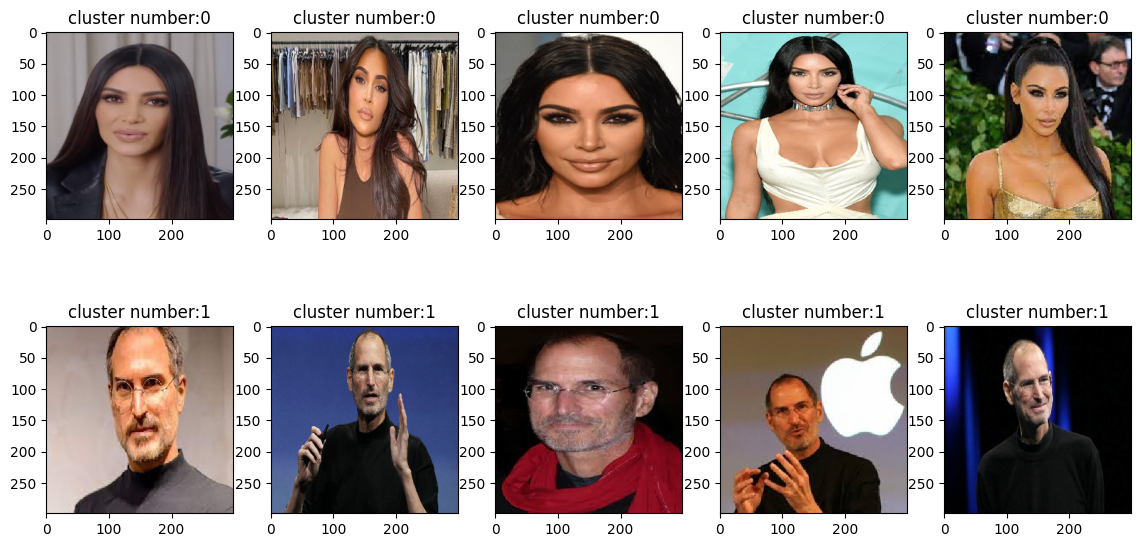

In [30]:
plot_images(X, kmeans_prediction, clustering=True)

Orange workflow


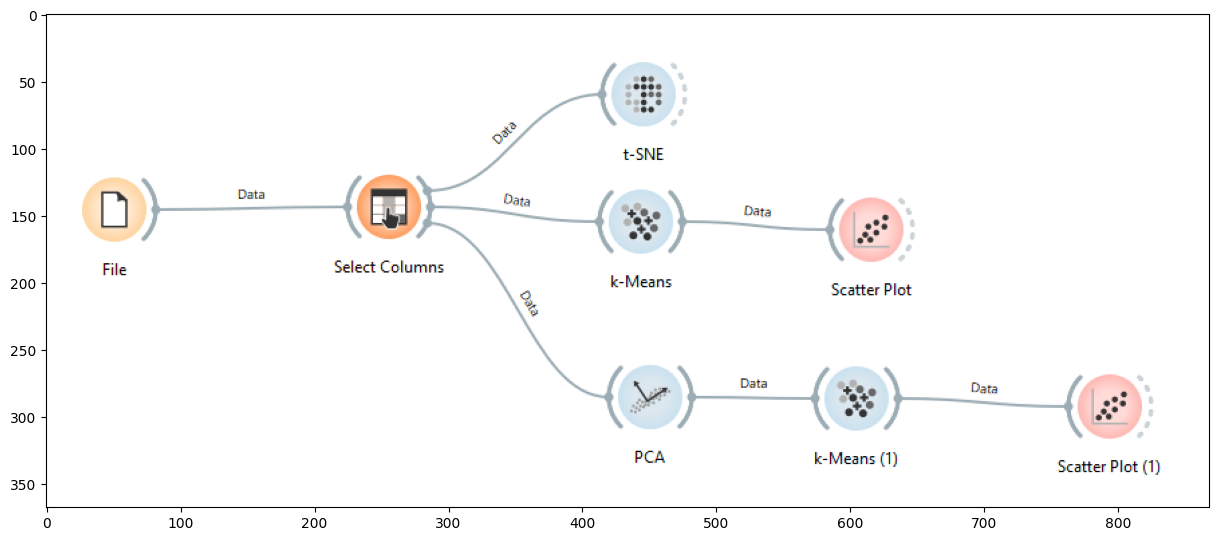

t-SNE results:


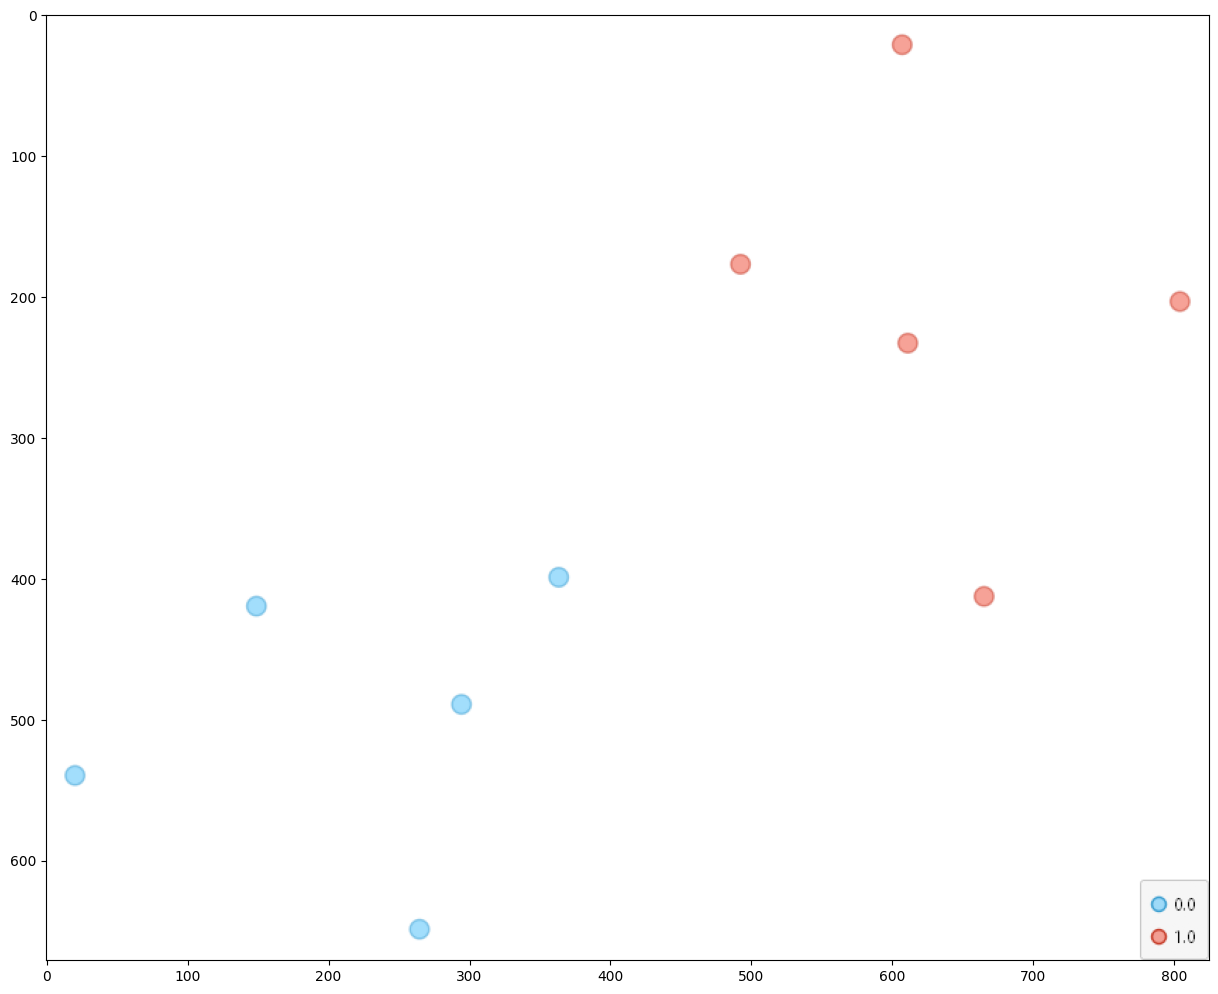

Raw kmenas results:


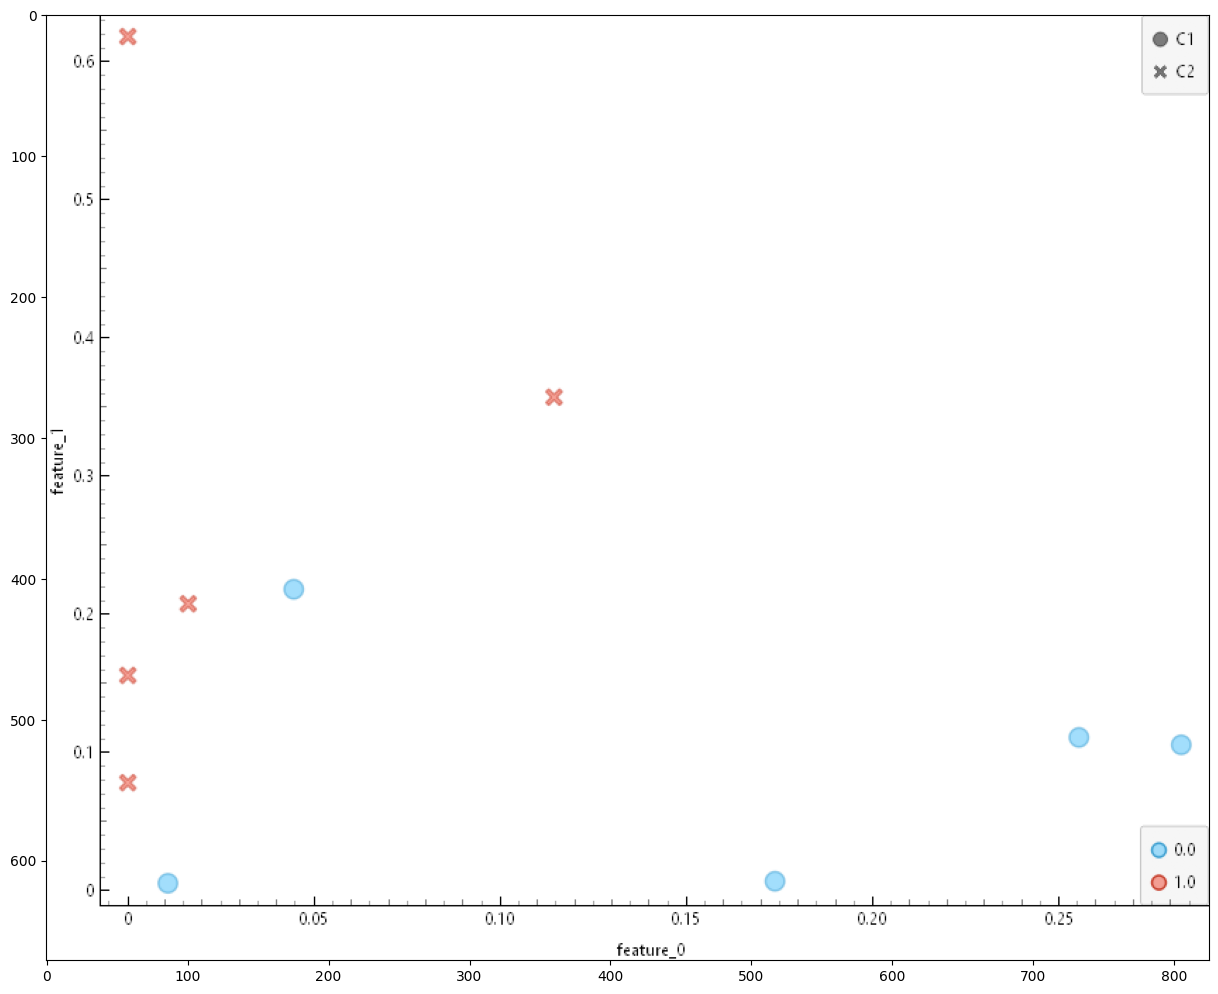

PCA + kmeans results:


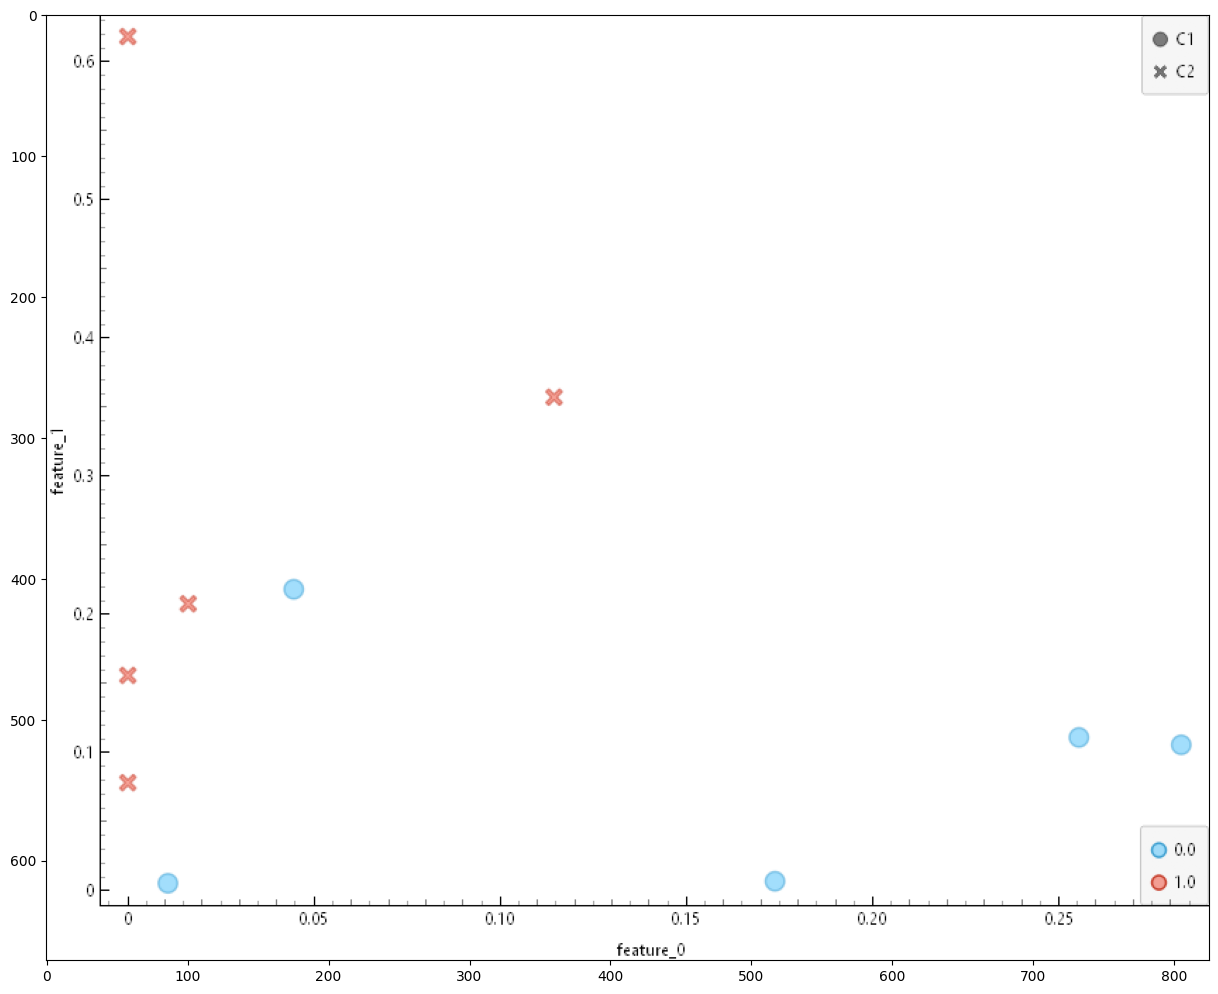

In [31]:
print("Orange workflow")
img = load_img("orangeworkflow.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("t-SNE results:")
img = load_img("tsne.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("Raw kmenas results:")
img = load_img("kmeans.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("PCA + kmeans results:")
img = load_img("kmeanspca.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

In [ ]:
WNIOSKI:

t-SNE Results
t-SNE przekształciło dane w przestrzeń 2D w taki sposób, aby zachować lokalną strukturę danych.
Wyraźnie widać dwa skupiska punktów, co sugeruje, że dane można dobrze podzielić na dwie grupy (klastry).
Rozdzielenie między grupami jest zauważalne, co wskazuje na to, że metoda redukcji wymiarowości uchwyciła różnice między nimi.

Raw k-Means Results
Punkty zostały podzielone na dwa klastry: oznaczone różnymi kolorami lub symbolami (np. x i o).
                                                                                    
Kolejne
PCA + k-Means Results
Obserwacje:

Po redukcji wymiarowości metodą PCA, dane zostały również podzielone na dwa klastry.
a klastrów jest taki sam
Punkty oznaczone kółkami i krzyżykami są rozmieszczone zgodnie z wcześniejszym podziałem k-Means.

In [ ]:
KLASYFIKACJA

In [32]:
base_model = Xception(include_top=False, input_shape=(299, 299, 3), weights="imagenet")

base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer_8[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_32 (Conv2D)            │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [33]:
base_model.trainable = False

In [34]:
from keras import Model
from keras.layers import Input, GlobalAveragePooling2D, Dense

# Ustawienie wejścia z odpowiednimi wymiarami obrazu
input_layer = Input(shape=(299, 299, 3))

# Przepuszczenie danych przez model bazowy
x = base_model(input_layer, training=False)

# Dodanie GlobalAveragePooling2D
x = GlobalAveragePooling2D()(x)

# Dodanie warstwy Dense z 1 neuronem i aktywacją sigmoid
output_layer = Dense(1, activation='sigmoid')(x)

# Stworzenie modelu końcowego
new_model = Model(inputs=input_layer, outputs=output_layer)

# Wyświetlenie architektury modelu
new_model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [35]:
from keras.optimizers import Adam

# Kompilacja modelu
new_model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Trening modelu
history = new_model.fit(X, y, epochs=7, verbose=1)

# Wyświetlenie wyników
print("Historia treningu:")
print(history.history)


Epoch 1/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4000 - loss: 0.7615
Epoch 2/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step - accuracy: 0.4000 - loss: 0.6977
Epoch 3/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 754ms/step - accuracy: 0.6000 - loss: 0.6382
Epoch 4/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 759ms/step - accuracy: 0.9000 - loss: 0.5831
Epoch 5/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 708ms/step - accuracy: 1.0000 - loss: 0.5322
Epoch 6/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 761ms/step - accuracy: 1.0000 - loss: 0.4856
Epoch 7/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 742ms/step - accuracy: 1.0000 - loss: 0.4429
Historia treningu:
{'accuracy': [0.4000000059604645, 0.4000000059604645, 0.6000000238418579, 0.8999999761581421, 1.0, 1.0, 1.0], 'loss': [0.7615431547164917, 0.6976982951164246, 0.6381953358650208, 0.5830601453781128, 0.5322341918945312, 0.4855809211730957, 0.4429025650024414]}


In [37]:
nn_pred_train = new_model.predict(X)
print("train raw:")
print(nn_pred_train)
nn_pred_train_binary = np.round(nn_pred_train)
print("train binary:")
print(nn_pred_train_binary)

nn_pred_test = new_model.predict(X_test)
print("test raw:")
print(nn_pred_test)
nn_pred_test_binary = np.round(nn_pred_test)
print("test binary:")
print(nn_pred_test_binary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
train raw:
[[0.45681864]
 [0.27596736]
 [0.3214823 ]
 [0.30326548]
 [0.30636013]
 [0.66296226]
 [0.6927419 ]
 [0.67011374]
 [0.6905725 ]
 [0.6422832 ]]
train binary:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
test raw:
[[0.35888433]
 [0.32598925]
 [0.6432961 ]
 [0.6198313 ]]
test binary:
[[0.]
 [0.]
 [1.]
 [1.]]


In [38]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y, nn_pred_train_binary)
test_accuracy = accuracy_score(y_test, nn_pred_test_binary)

train
accuracy: 1.0


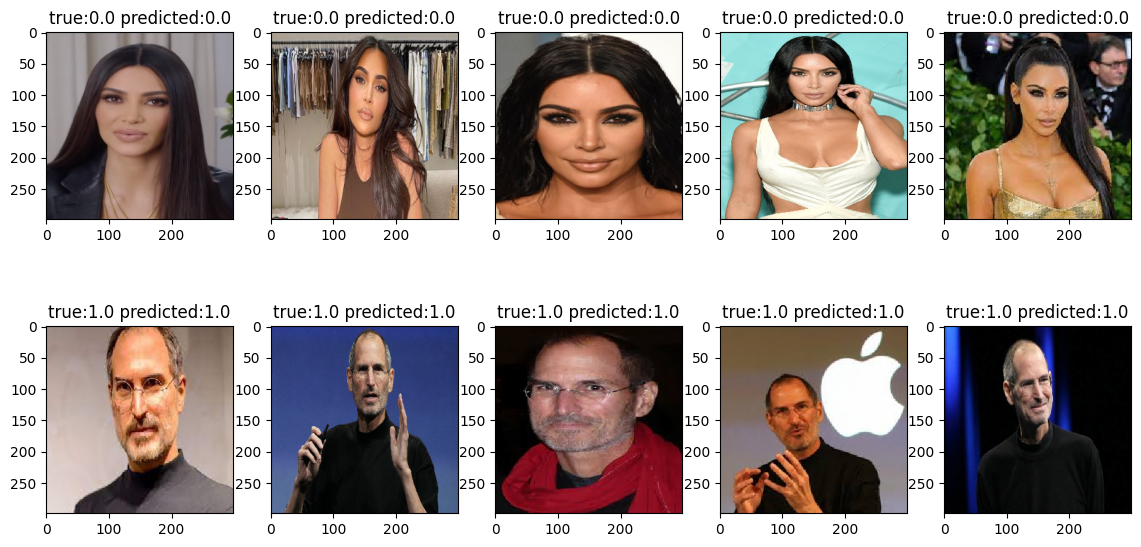

test
accuracy: 1.0


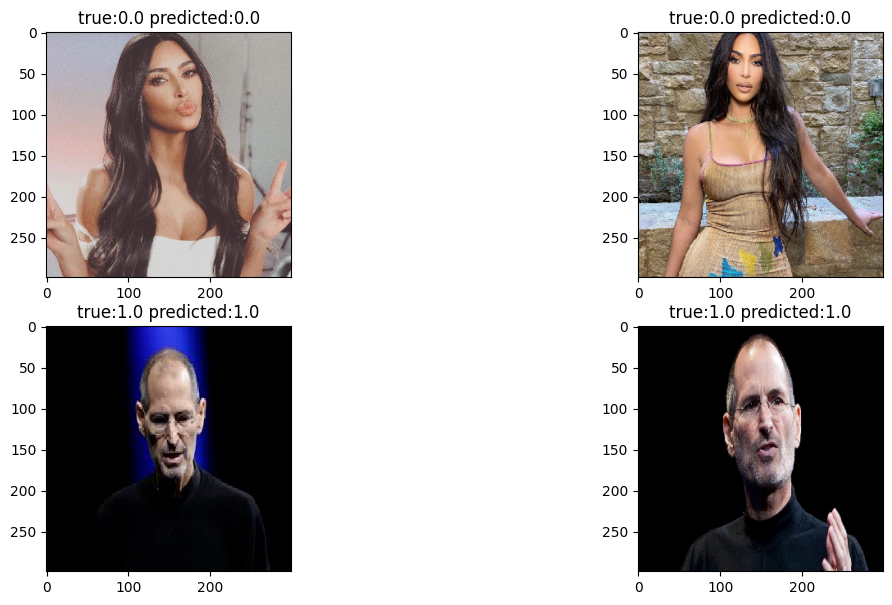

In [39]:
print("train")
print(f"accuracy: {train_accuracy}")
plot_images(X, y, rows=2, cols=5, clustering=False, nntesting=True, y_pred=nn_pred_train_binary.reshape(nn_pred_train_binary.shape[0]))
print("test")
print(f"accuracy: {test_accuracy}")
plot_images(X_test, y_test, rows=2, cols=2, clustering=False, nntesting=True, y_pred=nn_pred_test_binary.reshape(nn_pred_test_binary.shape[0]))